# Python Data Analysis

The **target** value or **label** is the value that we would like to predict using the other variables.

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("assets/sales.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/10,669165933,6/27/10,9925,255.28,159.42,2533654.00,1582243.50,?
1,Central America and the Caribbean,Grenada,Cereal,?,C,8/22/12,963881480,9/15/12,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,?,L,5/2/14,341417157,5/8/14,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/14,514321792,7/5/14,8102,9.33,6.92,75591.66,56065.84,?
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/13,115456712,2/6/13,5062,651.21,524.96,3296425.02,2657347.52,639077.5


## Pre-Processing

After the data has been loaded, we then apply an assortment of techniques to prepare the raw data for analysis. This includes: dealing with missing values, data formatting and normalization/scaling.

#### Dealing With Missing Values

Missing values are common. The first step is to identify missing values (using ```df.isnull()``` or ```df.notnull()```) and replace them with the standard ```NaN```. Next, we decide how to deal with the holes in the dataset. One initial option is to check with the collection source to see whether the missing data can be obtained or estimated. If not, then there are several additional options:

* Replace the missing value:
    * With the average (of similar data points)
    * With the mode, if it is a categorical variable
    * Using another estimation technique
* Or, you may choose to remove the missing data:
    * Either by dropping the data entry (row): ```axis = 0```
    * Or by dropping the entire variable (column): ```axis = 1```
* Lastly, you may choose to leave the missing data as is

In [5]:
df.replace("?", np.nan, inplace = True) # Replace ? with standard NaN

In [6]:
missing_data = df.isnull()
missing_data.head() # Returns matrix of True/False values, indicating where data is missing

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Display total number of True/False values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Region
False    100
Name: Region, dtype: int64

Country
False    100
Name: Country, dtype: int64

Item Type
False    100
Name: Item Type, dtype: int64

Sales Channel
False    97
True      3
Name: Sales Channel, dtype: int64

Order Priority
False    100
Name: Order Priority, dtype: int64

Order Date
False    100
Name: Order Date, dtype: int64

Order ID
False    100
Name: Order ID, dtype: int64

Ship Date
False    100
Name: Ship Date, dtype: int64

Units Sold
False    100
Name: Units Sold, dtype: int64

Unit Price
False    100
Name: Unit Price, dtype: int64

Unit Cost
False    100
Name: Unit Cost, dtype: int64

Total Revenue
False    100
Name: Total Revenue, dtype: int64

Total Cost
False    100
Name: Total Cost, dtype: int64

Total Profit
False    97
True      3
Name: Total Profit, dtype: int64



In [8]:
df.dropna(subset = ["Sales Channel"], axis = 0) # Returns a new modified dataframe; good for testing
df.dropna(subset = ["Sales Channel"], axis = 0, inplace = True) # Modifies dataframe in-place
df.reset_index(drop = True, inplace = True) # Reset index, since we dropped rows

In [9]:
avg = df["Units Sold"].mean()
df["Units Sold"] = df["Units Sold"].replace(np.nan, avg) # Replace NaN with mean value

In [10]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/10,669165933,6/27/10,9925,255.28,159.42,2533654.00,1582243.50,NaN
1,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/14,514321792,7/5/14,8102,9.33,6.92,75591.66,56065.84,NaN
2,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/13,115456712,2/6/13,5062,651.21,524.96,3296425.02,2657347.52,639077.5
3,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/11,135425221,4/27/11,4187,668.27,502.54,2798046.49,2104134.98,NaN
4,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/12,871543967,7/27/12,8082,154.06,90.93,1245112.92,734896.26,510216.66


#### Formatting

Formatting is the process by which data is transformed to provide a common standard of expression. This facilitates aggregation and comparison. Often this involves performing calculations on an entire column of data to convert it into the desired units or using ```astype()``` to convert data into the correct type.

In [11]:
df["Unit Cost"] = df["Unit Cost"] * 0.89 # Convert USD to Euro
df.rename(columns={"Unit Cost":"Unit Cost (EUR)"}, inplace=True)

In [12]:
df["Unit Price"] = df["Unit Price"].astype("int") # Cast column to integer type

In [13]:
df.dtypes

Region              object
Country             object
Item Type           object
Sales Channel       object
Order Priority      object
Order Date          object
Order ID             int64
Ship Date           object
Units Sold           int64
Unit Price           int64
Unit Cost (EUR)    float64
Total Revenue      float64
Total Cost         float64
Total Profit        object
dtype: object

#### Normalization

Normalization is the process of scaling values to a range that is consistent with the rest of the data. This enables fair comparison between variables and gives them equal influence on the model and our results. 

There are three main techniques for normalizing data:

* Simple Feature Scaling (range: 0 to 1)

$ 
\begin{align} x_{new} = \frac{x_{old}}{x_{max}} \end{align}
$

* Min-Max (range: 0 to 1)

$ 
\begin{align} x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}} \end{align}
$

* Z-score aka Standard Score (typical range: -3 to 3)

$ 
\begin{align} x_{new} = \frac{x_{old} - \mu}{\sigma} \end{align}
$

In [14]:
a = {"age": [20, 30, 40], "income": [100000, 20000, 50000]} # Not normalized
df = pd.DataFrame(a)
df

,age,income
0,20,100000
1,30,20000
2,40,50000


In [15]:
# Simple Feature Scaling
df["age_sfs"] = df["age"] / df["age"].max()
df["income_sfs"] = df["income"] / df["income"].max()
df

,age,income,age_sfs,income_sfs
0,20,100000,0.50,1.0
1,30,20000,0.75,0.2
2,40,50000,1.00,0.5


In [16]:
# Min-Max
df["age_mm"] = (df["age"] - df["age"].min()) / (df["age"].max() - df["age"].min())
df["income_mm"] = (df["income"] - df["income"].min()) / (df["income"].max() - df["income"].min())
df

,age,income,age_sfs,income_sfs,age_mm,income_mm
0,20,100000,0.50,1.0,0.0,1.000
1,30,20000,0.75,0.2,0.5,0.000
2,40,50000,1.00,0.5,1.0,0.375


In [17]:
# Z-Score
df["age_z"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["income_z"] = (df["income"] - df["income"].mean()) / df["income"].std()
df

,age,income,age_sfs,income_sfs,age_mm,income_mm,age_z,income_z
0,20,100000,0.50,1.0,0.0,1.000,-1.0,1.072222
1,30,20000,0.75,0.2,0.5,0.000,0.0,-0.907265
2,40,50000,1.00,0.5,1.0,0.375,1.0,-0.164957


#### Binning

Binning involves grouping values, often transforming them from numerical into categorical variables.

In [18]:
price = {"price":[10000, 50000, 12000, 66000, 99000, 4000, 24000, 78000, 2900, 44000]}
df = pd.DataFrame(price)
df

,price
0,10000
1,50000
2,12000
3,66000
4,99000
5,4000
6,24000
7,78000
8,2900
9,44000


In [19]:
bins = np.linspace(df["price"].min(),df["price"].max(),4)
bin_names = ["Low", "Moderate", "High"]
df["binned"] = pd.cut(df["price"], bins, labels=bin_names, include_lowest=True)
df

,price,binned
0,10000,Low
1,50000,Moderate
2,12000,Low
3,66000,Moderate
4,99000,High
5,4000,Low
6,24000,Low
7,78000,High
8,2900,Low
9,44000,Moderate


In [20]:
print("Most common bin:", df["binned"].value_counts().idxmax())
df["binned"].value_counts()

Most common bin: Low


Low         5
Moderate    3
High        2
Name: binned, dtype: int64

In [21]:
import seaborn as sns

g = sns.distplot(df["price"], kde=False)

#### Converting Categorical Variables

Most statistical models cannot take categorical variables (objects/strings) as input. Instead, we convert these variables into numbers, assigning either 0 or 1 using a technique called "one-hot encoding".

In [22]:
cars = {"car": ['A','B','C','D'], "fuel":["gas","diesel","gas","diesel"]}
df = pd.DataFrame(cars)
df

,car,fuel
0,A,gas
1,B,diesel
2,C,gas
3,D,diesel


In [23]:
dummies = pd.get_dummies(df["fuel"]).rename(columns=lambda x: "fuel_" + str(x))
df = pd.concat([df, dummies], axis=1)
df

,car,fuel,fuel_diesel,fuel_gas
0,A,gas,0,1
1,B,diesel,1,0
2,C,gas,0,1
3,D,diesel,1,0


In [24]:
df.drop(["fuel"],axis=1,inplace=True)
df

,car,fuel_diesel,fuel_gas
0,A,0,1
1,B,1,0
2,C,0,1
3,D,1,0


## Exploratory Data Analysis (EDA)

Key methods/techniques:

* **Data Description**: ```df.describe()``` to see compute basic statistics for all continuous variables (```NaN``` values are excluded)
* **Value Counts**: ```df["col"].value_counts()``` to see how often values occur for a variable
* **Box Plots:** visualize distributions of numeric data, specifically upper/lower quartiles and upper/lower extremes, as well as any outliers
* **Scatter Plots:** plot the independent variable on the x-axis and the target variable on the y-axis to visualize trends
* **Group By:** ```df.groupby()``` to view summary statistics for various segments of the data
* **Pivot:** ```df.pivot()``` to reorganize rows as columns
* **Heatmap:** ```plt.pcolor()``` to use color scales to visualize the range of data values
* **Correlation:** ```df.corr()``` measures to what extent different variables are interdependent
    * Pearson Correlation Coefficient: the linear dependence between two variables, ranging from -1 (large negative relationship) to 1 (large positive relationship)
    * P-Value: ranging from <0.001 (strong certainty), to <0.05 (moderate certainty), to <0.1 (weak certainty), to >0.1 (no certainty)
    * Correlation heatmap: indicates correlation of each variable with each other
* **ANOVA (Analysis of Variance):** analyzes the variation between the mean values of different segments of categorical variables to determine the relative impact of the variable on the target
    * F-Test Score: the larger the value, the more significant the difference between the means of each group and the stronger the correlation
    * P-Value: the smaller the value, the more statistically significant is our F-Test Score

#### Descriptive Statistical Analysis

In [25]:
df = pd.read_csv("assets/cars.csv")
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [26]:
df.describe(include=["object"]) # Specify data types to be summarized

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [27]:
vc = df["drive-wheels"].value_counts().to_frame() # Convert series to dataframe
vc.rename(columns={"drive-wheels":"value_counts"},inplace=True)
vc.index.name = "drive-wheels"
vc

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


#### Visualizations

(0, 47993.53770515762)

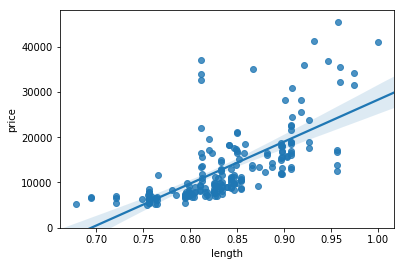

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.regplot(x="length", y="price", data=df) # Scatterplots for continuous variables
plt.ylim(0,)

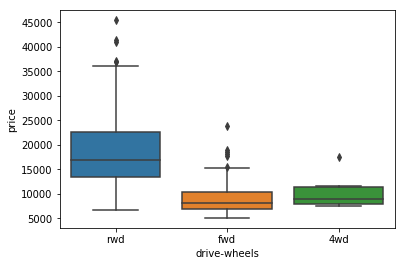

In [29]:
sns.boxplot(x="drive-wheels", y="price", data=df) # Boxplots for categorical variables

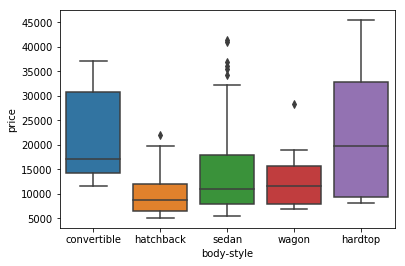

In [30]:
# Overlap between distributions indicate that the variable would be a poor predictor for the target
sns.boxplot(x="body-style", y="price", data=df)

#### Group By

In [31]:
grouped = df[["body-style","price"]].groupby(["body-style"],as_index=False).mean()
grouped.sort_values(by="price",ascending=False)

,body-style,price
1,hardtop,22208.500000
0,convertible,21890.500000
3,sedan,14459.755319
4,wagon,12371.960000
2,hatchback,9957.441176


In [32]:
# Grouping by multiple variables
grouped = df[["body-style","drive-wheels","price"]].groupby(["body-style","drive-wheels"],as_index=False).mean()
grouped

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [33]:
# Pivot to improve readability
grouped = grouped.pivot(index="body-style",columns="drive-wheels")
grouped

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [34]:
grouped = grouped.fillna(0)
grouped

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible       0.000000  11595.000000  23949.600000
hardtop           0.000000   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

#### Correlation

In [35]:
df.corr() # Pearson Correlation - To see whether a linear relationship exists between two variables

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [36]:
df[["stroke","horsepower","price"]].corr()

,stroke,horsepower,price
stroke,1.000000,0.098462,0.082310
horsepower,0.098462,1.000000,0.809575
price,0.082310,0.809575,1.000000


In [37]:
from scipy import stats
correlation_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("Correlation coefficient:", correlation_coef, "P-value:", p_value)

Correlation coefficient: 0.8095745670036559 P-value: 6.36905742825998e-48


#### ANOVA

In [38]:
grouped = df[["drive-wheels","price"]].groupby(["drive-wheels"])
# Correlation between all three groups
f_val, p_val = stats.f_oneway(grouped.get_group('4wd')['price'], grouped.get_group('rwd')['price'], grouped.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.3998164165626 , P = 0.00045857258381181207


In [39]:
# Correlation between only two of the three
f_val, p_val = stats.f_oneway(grouped.get_group('fwd')['price'], grouped.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### Heatmaps

TypeError: Invalid comparison between dtype=float64 and str

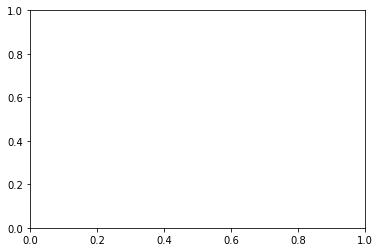

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped, cmap=plt.cm.Reds)

# Labels
row_labels = grouped.columns.levels[1]
col_labels = grouped.index

# Move ticks/labels to center
ax.set_xticks(np.arange(grouped.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
np.arange(grouped.shape[0]) + 0.5

In [ ]:
np.arange(grouped.shape[0])

## Model Development

Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) are techniques used to define the relationship between one or more variables and the target. A slope parameter, $b_i$, is calcualted for each independent variable, $x_i$ and, along with an intercept parameter, $b_0$, forms the basis of the linear relationship. The resulting model, $\hat{y}$, can be used to predict output for inputs that have not yet been observed. 

$ 
\begin{align} \hat{y} = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \end{align}
$


#### Simple Linear Regression

In [ ]:
# SLR
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[["horsepower"]]
y = df["price"]
lm.fit(x, y) # Train the model using x as independent variable and y as target variable
print("Model Parameters: b0=", lm.intercept_, "b1=", lm.coef_) # Note the trailing underscore which denotes fitted attributes
y_hat = lm.predict(x) # Output predictions using model
print("A few predicted outputs:", y_hat[0:5])

In [ ]:
sns.regplot(x="horsepower", y="price", data=df)

In [ ]:
xx = pd.DataFrame()
xx["x_range"] = np.linspace(df["horsepower"].min(),df["horsepower"].max(),40)
xx["y_hat"] = lm.predict(xx[["x_range"]])

sns.regplot(x="x_range", y="y_hat", data=xx)

In [ ]:
# Alternative plotting technique
x_range = np.arange(1, 100, 1).reshape(-1, 1)
y_hat = lm.predict(x_range)
plt.plot(x_range, y_hat)

#### Multiple Linear Regression

In [ ]:
# MLR
lm = LinearRegression()
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
y = df["price"]
lm.fit(z, y)
y_hat = lm.predict(z)

#### Residual Plot

Residual plots illustrate the difference between actual values and predicted values, i.e. $\hat{y_i}-y_i$. They are used to determine whether or not certain types of models are appropriate. Residuals that are equally distributed around the mean are representative of constant variance; this indicates that a linear model is a good fit for the data. If the residuals vary with $x$, then a non-linear model might better represent the data.

In [ ]:
sns.residplot(x="length", y="price", data=df)

#### Distribution Plot

Distribution plots compare predicted output with actual observed values and are used to identify regions when modelled output fails to fit the underlying process. These visualizations are critical when working with more complicated MLR models, which cannot be visualized using regression or residual plots.

One important observation is how the distribution plot changes when different independent variables are used to train the model. This is particularly stark when using only a single independent variable (SLR) vs. multiple indepedent variables (MLR). 

In [ ]:
# MLR
lm = LinearRegression()
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]] # Add/remove variables to see how model changes
y = df["price"]
lm.fit(z, y)
y_hat = lm.predict(z)

ax1 = sns.distplot(df["price"], hist=False, color='r', label="Actual Values")
sns.distplot(y_hat, hist=False, color='b', label="Model Output", ax=ax1)

plt.title("Actual vs MLR Model Output for Price")
plt.xlabel("Price ($)")
plt.ylabel("Proportion of Cars")

#### Polynomial Regression, Multivariate Polynomial Regression & Pipelines

When simple linear models are not appropriate, polynomial regression and multivariate polynomial regression may be used. First, the data is normalized and then it is transformed into a polynomial. Then, linear regression is applied to fit a model to the the data. The multi-stage process is streamlined using Pipelines.

NumPy's built in ```polyfit()``` method can be used to fit models of the form: $\hat{y} = b_0 + b_1x + b_2x^2 + ... + b_nx^n$. The order parameter determines the degree of the polynomial.

It is necessary to use scikit-learn for multi-dimensional polynomial regression, i.e. models of the form: $\hat{y} = b_0 + b_1x_1 + b_2x_2 + b_3x_1x_2 + b_4(x_1)^2 + b_5(x_2)^2 + b_6(x_1)^2(x_2)^2 + ...$

#### Polynomial Regression

In [ ]:
x = df["highway-mpg"]
y = df["price"]
sns.residplot(x, y) # Residuals that vary with x -> suggest non-linear model is appropriate

In [ ]:
f = np.polyfit(x, y, 3) # Adjust the order of the polynomial
p = np.poly1d(f)
print(p)

In [ ]:
# Create function to graph polynomial model equations
def graph_polynomial(p, x, y, var_name):
    x_range = np.linspace(x.min(), x.max(), 100)
    y_hat = p(x_range)
    
    plt.plot(x, y, '.', x_range, y_hat, "-")
    plt.title("Polynomial Fit of " + var_name)
    plt.xlabel(var_name)
    plt.ylabel("Price")
    
    plt.show()
    plt.close()

In [ ]:
graph_polynomial(p, x, y, x.name)

#### Multivariate Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
z_pr = pr.fit_transform(z)
print("Original data:", z.shape, "Transformed data:", z_pr.shape)
poly = LinearRegression()
poly.fit(z_pr, df["price"])
y_hat = poly.predict(z_pr)
y_hat[0:5]

#### Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

pipe = Pipeline(Input)

In [ ]:
pipe.fit(z, y)
ypipe = pipe.predict(z)
ypipe[0:5]

#### Measures for In-Sample Evaluation

In-sample evaluation provides an estimation of how well our model fits the training data.

**Mean Squared Error (MSE)**

MSE measures the difference between actual values, $y_i$, and modelled values, $\hat{y_i}$. The MSE for a MLR model will be smaller than the MSE for a SLR model; likewise, the MSE will be smaller for polynomial regression models than for linear regression models. Typically, the closer MSE is to zero, the better the model.

**$R^2$ aka Coefficient of Determination**

$R^2$ compares the MSE of the regression model, i.e. using $\hat{y_i} - y_i$, to the MSE of the mean, i.e. using $\hat{y_i} - \bar{y}$. The basis of this formula is the notion that, if our linear model is appropriate, then it should be a more accurate predictor than simply using the average of the original data points. A value of 1 indicates that 100% of the variation in the target variable is explained using the linear model.

$
\begin{align} R^2 = 1 - \frac{MSE \;\hat{y}}{MSE \;\bar{y}} \end{align} = 1 - \frac{Explained\;Variation}{Total\;Variation} 
$

#### $R^2$ & MSE - Calculations

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# SLR
lm = LinearRegression()
x = df[["horsepower"]]
y = df["price"]
lm.fit(x, y)
y_hat = lm.predict(x)

r2 = lm.score(x, y)
mse = mean_squared_error(y, y_hat)

print("SLR -> R2:", r2, " MSE:", mse)

In [ ]:
# MLR
z = df[["horsepower","length"]]
lm.fit(z, y)
y_hat = lm.predict(z)

r2 = lm.score(z, y)
mse = mean_squared_error(y, y_hat)

print("MLR -> R2:", r2, " MSE:", mse)

In [ ]:
# Polynomial
from sklearn.metrics import r2_score
x = df["horsepower"]
f = np.polyfit(x, y, 2)
p = np.poly1d(f)

r2 = r2_score(y, p(x))
mse = mean_squared_error(y, p(x))

print("Polynomial Reg -> R2:", r2, " MSE:", mse)

#### Out-of-Sample Evaluation

While in-sample measures give us an idea of how well our model fits the training data, it does not indicate how well the model will perform on new data. We can use out-of-sample evaluation to approximate the model output using real world data.

The Scikit-learn package enables us to perform out-of-sample techniques. First, the data split into training and testing sets using ```train_test_split()```. The training set is used to train the model; then, the model is applied to the testing set to assess performance. **Cross validation** is the process in which all of the observations are segmented into a desired number of "folds" and rotated between training and testing. Scores for each fold are retreived via ```cross_val_score()```. Likewise, different folds can be used to predict and then test predictions using ```cross_val_predict()```.

**Generalization error** is a measure of how well the model performs on previously unseen data. If we use lots of training data sets, we can get an accurate but imprecise approximation of generalization error. Conversely, lots of testing data sets will result in a precise but inaccurate approximation of generalization error.

A fitted model can fail to represent the underlying data in three main ways:

* **Underfitting:** the model is not complex enough to fit the data - too many errors
* **Good fit:** the model accurately represents the data
* **Overfitting:** the model is too flexible and fits the noise rather than the underlying process - too much variation

As the magnitude of the polynomial order increases, the MSE of the training error decreases. However, that does not mean that the highest order polynomial is always the best fit. Rather, when selecting a polynomial model, we seek to minimize the difference between the training error and the test error, which reaches an inflection point before starting to increase. This can be done by selecting the order of polynomial that maximizes the $R^2$ value. Note that a negative $R^2$ value is a sign of overfitting.

Even if we select the best order polynomial, it is impossible to completely eliminate all error in our model. This is due to the inherent noise in every system, which is both random and unpredictable, resulting in so-called irreducible error. Other sources of error include: incorrect assumptions of signal form (for example, using polynomials rather than sinusoids) and using data that does not fully represent the system in question.

**Ridge Regression** is a regression method that, using the hyperparameter *alpha*, allows us to adjust the magnitude of the coefficients of higher order polynomials. This is useful when working with datasets that contain outliers, giving us more control over the shape of the curve.

**Grid Search** is a technique in which we iterate through various hyperparameters to determine which combination produces the most accurate model (maximum $R^2$/minimum MSE). Two hyperparameters of interest in ridge regression are *alpha* and *normalize*.

Model development is an iterative process involving training, validation of parameters and testing.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("assets/cars.csv")
df = df._get_numeric_data()

#### Train vs. Test

In [112]:
y = df["price"]
x = df.drop("price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

Number of training samples: 120
Number of testing samples: 81


In [113]:
features = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

lm = LinearRegression()
lm.fit(x_train[features], y_train) # Train model using training data

test_score = lm.score(x_test[features], y_test) # Assess performance using test data
print("Test score is typically less than training score:", test_score)

Test score is typically less than training score: 0.760142613711606


In [115]:
y_hat_train = lm.predict(x_train[features])
y_hat_test = lm.predict(x_test[features])

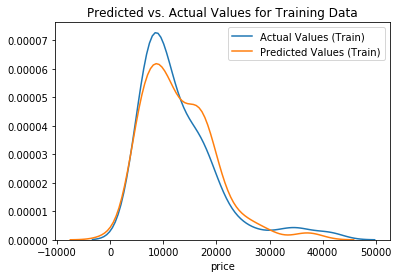

In [116]:
plt.title("Predicted vs. Actual Values for Training Data")
ax1 = sns.distplot(y_train, hist=False, label="Actual Values (Train)")
sns.distplot(y_hat_train, hist=False, label="Predicted Values (Train)", ax=ax1)

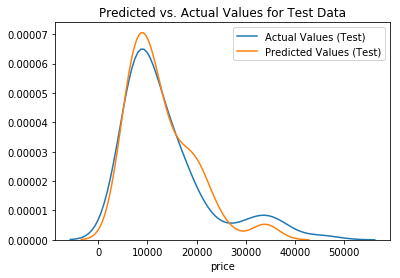

In [117]:
plt.title("Predicted vs. Actual Values for Test Data")
ax1 = sns.distplot(y_test, hist=False, label="Actual Values (Test)")
sns.distplot(y_hat_test, hist=False, label="Predicted Values (Test)", ax=ax1)

#### Cross Validation

In [118]:
# Split and rotate through data set using Cross Validation
num_folds = 4
scores = cross_val_score(lm, x[["horsepower"]], y, cv=num_folds)

for i in range(0, num_folds):
    print("Fold", i+1, "score:", scores[i])

Fold 1 score: 0.7746232020985575
Fold 2 score: 0.5171668710003469
Fold 3 score: 0.7478535338083454
Fold 4 score: 0.048396053261226424


In [119]:
y_hat = cross_val_predict(lm, x[["horsepower"]], y, cv=num_folds) # Using folds for predictions
y_hat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Overfitting vs. Underfitting

In [120]:
def PolyPlot(xtrain, xtest, y_train, y_test, lin_reg, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lin_reg.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Testing score: 0.6098082407434702


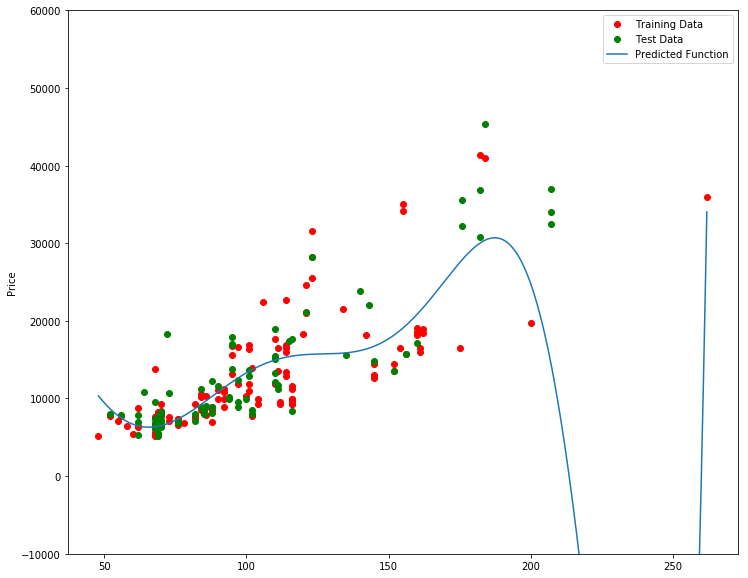

In [121]:
poly = PolynomialFeatures(degree=8)
x_train_trans = poly.fit_transform(x_train[["horsepower"]])
x_test_trans = poly.fit_transform(x_test[["horsepower"]])

lm = LinearRegression()
lm.fit(x_train_trans, y_train)

y_hat = lm.predict(x_test_trans)

print("Testing score:", lm.score(x_test_trans, y_test))

PolyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, lm, poly)

[0.7139364665406971, 0.712897321037301, 0.7161283749861571, 0.7081288142211125]
Max R^2 at: 3


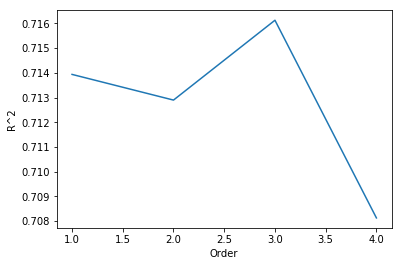

In [71]:
# Which order polynomial maximizes R^2?
order = [1, 2, 3, 4]
r2_test = []

for o in order:
    pr = PolynomialFeatures(degree=o)
    lm = LinearRegression()
    
    x_train_trans = pr.fit_transform(x_train[["horsepower"]])
    x_test_trans = pr.fit_transform(x_test[["horsepower"]])
    
    lm.fit(x_train_trans, y_train)
    
    score = lm.score(x_test_trans, y_test)
    r2_test.append(score)
    
print(r2_test)
print("Max R^2 at:",order[r2_test.index(max(r2_test))])

plt.xlabel("Order")
plt.ylabel("R^2")
plt.plot(order, r2_test)

#### Interactive: Polynomial Order & Train/Test Split

In [72]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(order, test_split):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split, random_state=0)
    poly = PolynomialFeatures(degree=order)
    x_train_trans = poly.fit_transform(x_train[["horsepower"]])
    x_test_trans = poly.fit_transform(x_test[["horsepower"]])
    lm = LinearRegression()
    lm.fit(x_train_trans, y_train)
    PolyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, lm, poly)

In [73]:
interact(f, order=(0, 6, 1), test_split=(0.05, 1, 0.1))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_split)>

#### Ridge Regression

In [103]:
ax = [0.01, 0.1, 1, 10, 100, 1000, 10000]
a_scores = []

for a in ax:
    poly = PolynomialFeatures(degree=2)
    x_train_trans = poly.fit_transform(x_train[["horsepower", "engine-size"]])
    x_test_trans = poly.fit_transform(x_test[["horsepower", "engine-size"]])

    rr = Ridge(alpha=a)
    rr.fit(x_train_trans, y_train)
    a_scores.append(rr.score(x_test_trans, y_test))

print("Best alpha selection:", ax[a_scores.index(max(a_scores))])

Best alpha selection: 10000


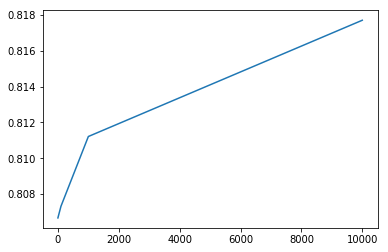

In [104]:
plt.plot(ax, a_scores)

#### GridSearch

In [110]:
parameters = [{"alpha": [0.01, 0.1, 1, 10, 100, 1000, 10000], "normalize": [True, False]}]

rr = Ridge()

grid = GridSearchCV(rr, parameters, cv=4) # Ridge object, parameters, number of folds

grid.fit(x_train_trans, y_train)

print("The optimal set of hyperparameters is:", grid.best_estimator_, "for a score of:", grid.score(x_test_trans, y_test))

The optimal set of hyperparameters is: Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) for a score of: 0.8112146710880027
